<a href="https://colab.research.google.com/github/Niespodzianek/PlanetHunter/blob/main/Exoplanets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### ***Config***

In [1]:
# !pip install lightkurve # for Google Colab only
%matplotlib inline
import lightkurve as lk
import matplotlib.pyplot as plt
import numpy as np

In [2]:
TIC = "TIC 142148228"

In [3]:
data = lk.search_lightcurve(TIC)

In [4]:
print(data)

SearchResult containing 99 data products.

 #     mission     year       author      exptime target_name distance
                                             s                 arcsec 
--- -------------- ---- ----------------- ------- ----------- --------
  0 TESS Sector 01 2018              SPOC     120   142148228      0.0
  1 TESS Sector 01 2018         TESS-SPOC    1800   142148228      0.0
  2 TESS Sector 01 2018               QLP    1800   142148228      0.0
  3 TESS Sector 01 2018             TASOC     120   142148228      0.0
  4 TESS Sector 01 2018 GSFC-ELEANOR-LITE    1800   142148228      0.0
  5 TESS Sector 01 2018             TASOC    1800   142148228      0.0
  6 TESS Sector 01 2018              TGLC    1800   142148228      0.0
  7 TESS Sector 01 2018             TASOC    1800   142148228      0.0
  8 TESS Sector 03 2018              SPOC     120   142148228      0.0
...            ...  ...               ...     ...         ...      ...
 89 TESS Sector 63 2023           

In [5]:
data_2 = data[23]
print(data_2)

SearchResult containing 1 data products.

 #     mission     year author exptime target_name distance
                                  s                 arcsec 
--- -------------- ---- ------ ------- ----------- --------
  0 TESS Sector 05 2018   SPOC     120   142148228      0.0


In [6]:
lc = data_2.download()

<Axes: xlabel='Time - 2457000 [BTJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

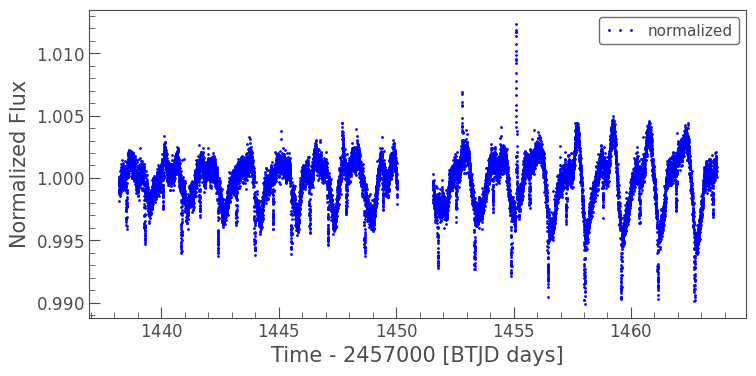

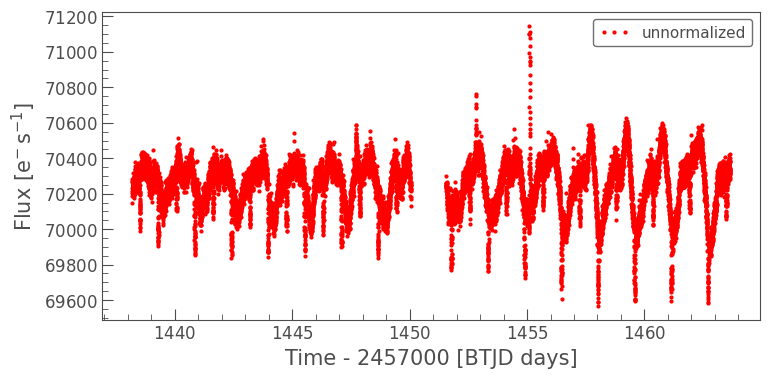

In [7]:
lc_normalized = lc.normalize()

lc_normalized.plot(linewidth=0, marker=".", color="blue", label="normalized")
lc.plot(linewidth=0, marker="o", color="red", label="unnormalized")

Plik lc to tablica danych

In [8]:
print(lc)

       time             flux         flux_err       timecorr    cadenceno  ... mom_centr1_err mom_centr2 mom_centr2_err   pos_corr1      pos_corr2   
                    electron / s   electron / s        d                   ...      pix          pix          pix            pix            pix      
------------------ -------------- -------------- -------------- ---------- ... -------------- ---------- -------------- -------------- --------------
   1437.9781845436            ———            ——— -8.3229318e-04     151577 ...            ———        ———            ———            ———            ———
1437.9795734220827            ———            ——— -8.3230302e-04     151578 ...            ———        ———            ———            ———            ———
1437.9809623005654            ———            ——— -8.3231286e-04     151579 ...            ———        ———            ———            ———            ———
 1437.982351179048            ———            ——— -8.3232269e-04     151580 ...            ———       

In [9]:
print(lc.columns)

<TableColumns names=('time','flux','flux_err','timecorr','cadenceno','centroid_col','centroid_row','sap_flux','sap_flux_err','sap_bkg','sap_bkg_err','pdcsap_flux','pdcsap_flux_err','quality','psf_centr1','psf_centr1_err','psf_centr2','psf_centr2_err','mom_centr1','mom_centr1_err','mom_centr2','mom_centr2_err','pos_corr1','pos_corr2')>


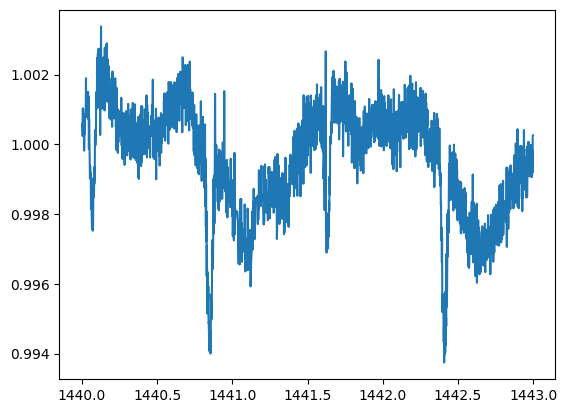

In [10]:
mask = (1440 < lc_normalized.time.value) & (lc_normalized.time.value < 1443)
plt.plot(lc_normalized.time.value[mask], lc_normalized.flux.value[mask])

### ***Faulse positives in backgroud flux***

<Axes: title={'center': 'Target ID: 142148228, Cadence: 151577'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

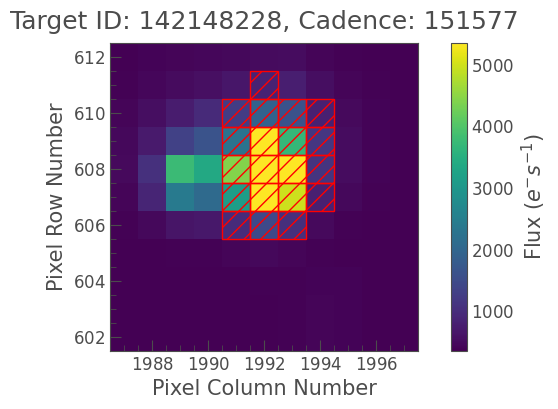

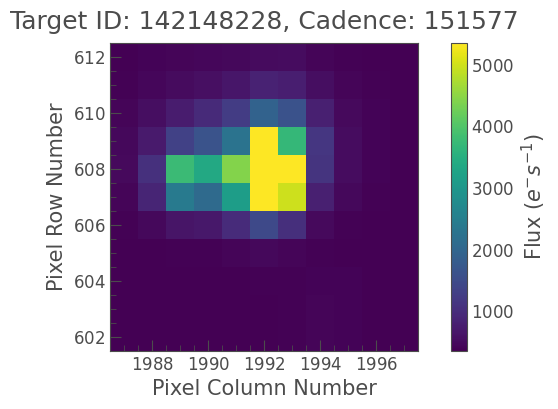

In [11]:
data_flux = lk.search_targetpixelfile(TIC, author="SPOC", sector=5)
tpf = data_flux.download()
tpf.plot(aperture_mask="pipeline")
tpf.plot()

In [12]:
print(lc.columns)

<TableColumns names=('time','flux','flux_err','timecorr','cadenceno','centroid_col','centroid_row','sap_flux','sap_flux_err','sap_bkg','sap_bkg_err','pdcsap_flux','pdcsap_flux_err','quality','psf_centr1','psf_centr1_err','psf_centr2','psf_centr2_err','mom_centr1','mom_centr1_err','mom_centr2','mom_centr2_err','pos_corr1','pos_corr2')>


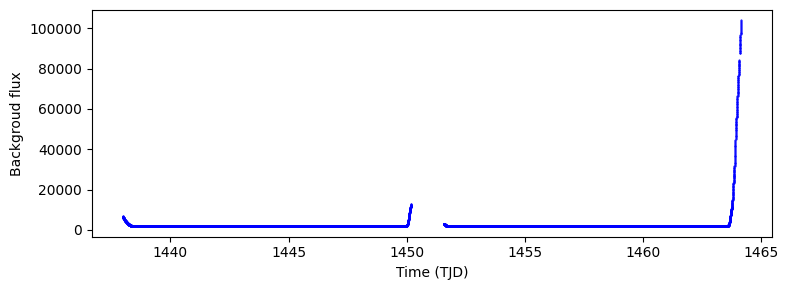

In [13]:
# wykres blasku tła
fig, ax = plt.subplots(figsize=(8, 3))
plt.plot(lc.time.value, lc.sap_bkg.value, color="blue", linewidth=0, marker=".", ms=1)
plt.ylabel("Backgroud flux")
plt.xlabel("Time (TJD)")
plt.tight_layout()
plt.show()

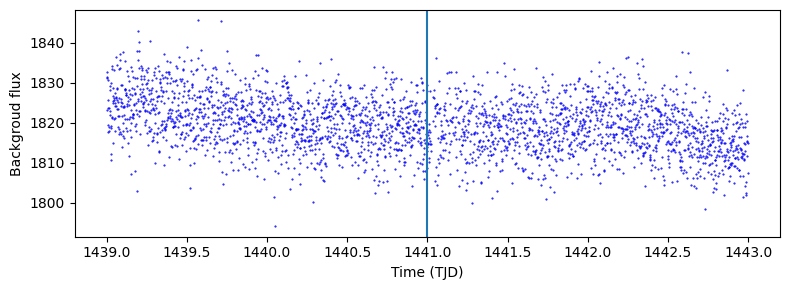

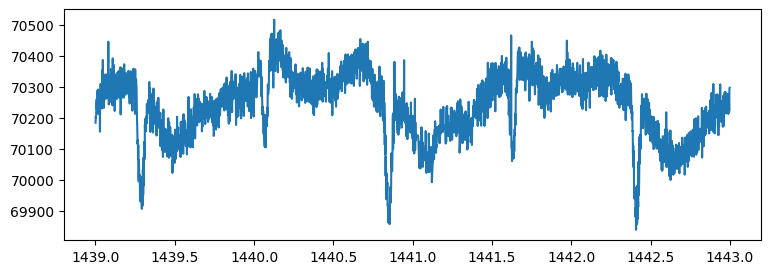

In [14]:
# czas tranzytu
transit_time =1441
# filtr czasowy
transit_mask = (lc.time.value > transit_time - 2) & (lc.time.value < transit_time + 2)

# wykres tła
fig, ax = plt.subplots(figsize=(8, 3))
plt.plot(lc.time.value[transit_mask], lc.sap_bkg.value[transit_mask], color="blue", linewidth=0, marker=".", ms=1)
plt.ylabel("Backgroud flux")
plt.xlabel("Time (TJD)")
plt.tight_layout()
# zaznaczenie mometu tranzytu
plt.axvline(transit_time)

plt.show()

# porównianie z krzywą światła
fig, ax = plt.subplots(figsize=(9, 3))
plt.plot(lc.time.value[transit_mask], lc.flux.value[transit_mask])
plt.show()

### ***Centroid motion***

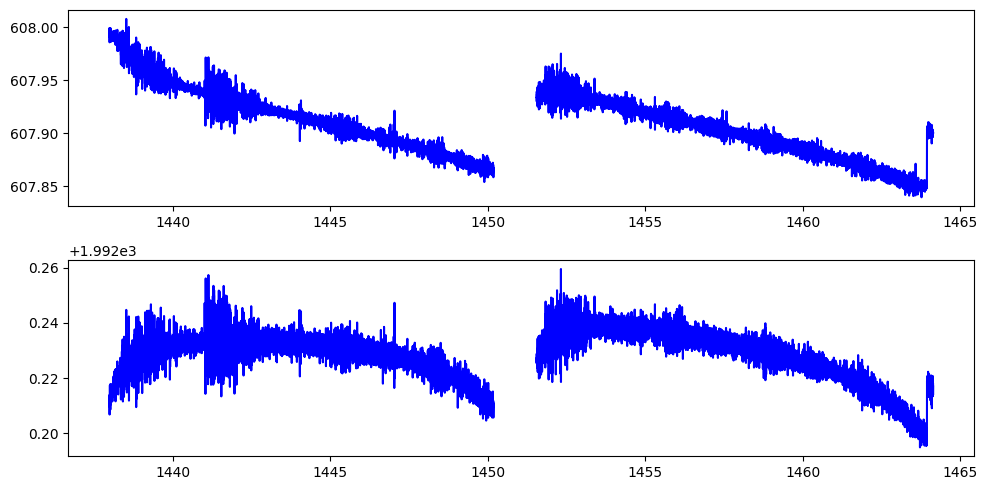

In [15]:
# print(lc.columns)
fig, ax = plt.subplots(2, 1, figsize=(10, 5))
ax[0].plot(lc.time.value, lc.centroid_row.value, color = "blue")
ax[1].plot(lc.time.value, lc.centroid_col.value, color = "blue")
plt.tight_layout()
plt.show()

Porównać wykres ze binowanym epizod 17 od połowy